# *NYC Water Usage Curve Fitting using Least Squares Approximation*

**By: NISHANTH PRAJITH**

## Data Source

<p style="text-align: justify;">The data source is downloaded from the NYC Open Data website[1] which is a free data distrubution platform published by NYC agencies and its partners. The data is information about the Water consumption in New York City. It has information about the population of new york city, total consumption per day and gallon per person per day. I will be using all the datasets and try to fit it to a curve. This data is particulary interesting because it shows how water consumption in a major city in the US has changed every year with the change in population in the city. It helps give a sense of how much water we use as human beings and how that trend shall change throughout the years to come.</p>

## Goals

<p style="text-align: justify;">In this notebook I will try to write a class that generalize the least squares approximation to a certain degree of percision. This will help ensure that with any sets of data, the least squares approximation is easily avaliable rather than having to calculate it out for each dataset and each degree of polynomial. In addition, I will try to see if the increase in population resulted in the increase in water consumption or decrease in it.</p>

## Importing Data

In [1]:
import numpy as np # Module used for use of matricies and matrix related calculations
import matplotlib.pyplot as plt # Module for plotting the data
import pandas as pd # Module that makes it easier for read .csv file and analyzing them.

In [2]:
# The CSV file data is imported and stored in the pandas DataFrame object called 'df'
df = pd.read_csv("Water_Consumption_In_NYC.csv")

In [3]:
df.head(10) # Simple check to see if the csv has been imported correctly

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
2,1981,7089241.0,1309.0,185
3,1982,7109105.0,1382.0,194
4,1983,7181224.0,1424.0,198
5,1984,7234514.0,1465.0,203
6,1985,7274054.0,1326.0,182
7,1986,7319246.0,1351.0,185
8,1987,7342476.0,1447.0,197
9,1988,7353719.0,1484.0,202


## Analyze the Data

In [4]:
class MyProgram:
    def __init__(self, degreesOfPercision, x, actualData, xlabel, ylabel): 
        '''
            Constructor that initializes all the variables for future calculations.
        '''
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.degreesOfPercision = degreesOfPercision
        self.xValues = np.array(x) # X values of the dataset
        self.actualData = actualData # Actual values or Y values of the dataset
        self.Identity = np.identity(self.degreesOfPercision, dtype = int) # Natural basis coefficients for the space 𝑊
        # Natural basis vectors for the space 𝑊
        self.w_vectors = np.array([[0 for i in range(len(self.xValues))] for j in range(self.degreesOfPercision)], dtype = float)
        # Orthogonal basis coefficients for space W
        self.y_vectors = np.array([[0 for i in range(len(self.xValues))] for j in range(self.degreesOfPercision)], dtype = float)
        # Orthogonal basis vectors for space W
        self.y_coef = np.array([[0 for i in range(self.degreesOfPercision)] for j in range(self.degreesOfPercision)], dtype = float)
        # Projection coefficients of the orthogonal basis projected on to sample W
        self.projCoef = np.array([0 for i in range(self.degreesOfPercision)], dtype = float)
        
    def __function__(self, constants, x):
        '''
            Function that takes in constants vector and an x value integer thats returns the value tabulated by a polynomial of the form:
            F(x) = a + bx^2 + cx^3 + dx^4 + ...
            (Here a, b, c, d are values from the constants a is the 1st constant, b is the 2nd, c is the 3rd, etc..)
            ---
            Returns an int
            ---
        '''
        answer = 0
        for i in range(len(constants)):
            # Loops through all the values inside the constants vector and calculate the values of the polynomial function
            answer += constants[i] * (x ** i)
        return answer
    
    def __coefficients_to_vector__(self, constants):
        '''
            Returns a numpy array that loops through all the X values in the dataset and adds the value returned by the
            polynomial function ('def __function__') into a numpy array (which is later returned).
            ---
            Returns a numpy array
            ---
        '''
        return_list = []
        for year in self.xValues:
            # Loops throguh all the values in the X values of the dataset and runs the '__function__' on each value.
            # The return value of '__function__' is then stored inside an array
            return_list.append(self.__function__(constants, year))
        return np.array(return_list) # Returns as a numpy array
    
    def calculate_W_Vectors(self):
        '''
            Calculates the values in the Natural basis vectors for the space 𝑊. 
            The function calls the '__coefficients_to_vector__' function and stores the data inside of w_vectors numpy array.
            The calculation is done by using all the value inside the w_coeffs(Identity) numpy array as constants for the polynomial funtion/equation.
            ---
            No return value.
            ---
        '''
        for i in range(self.degreesOfPercision):
            # Calls the coefficients_to_vector function and stores the return value inside the w vector.
            # This function loops through all the values in the Identity vector and uses those values as constants for the polynomial function/equation.
            self.w_vectors[i] = self.__coefficients_to_vector__(self.Identity[i])
    
    def calculate_y_Vectors_and_coeffs(self):
        '''
            Calculate the orthogonal vectors and coefficients using the Gram-Schmidt Orthogonalization Process and stores
            the answers into their appropriate numpy array.
            ---
            No return value
            ---
        '''
        for i in range(self.degreesOfPercision):
            # Initializes the vectors to i-th value from the w_vectors and w_coeffs(Identity) for calculation
            answer_Vector = np.array(self.w_vectors[i], dtype = float) 
            answer_coef = np.array(self.Identity[i], dtype = float)
            for j in range(i):
                # Gram-Schmidt Othogonalization formula
                answer_Vector -= np.array(((self.w_vectors[i] @ self.y_vectors[j])/(self.y_vectors[j] @ self.y_vectors[j])) * self.y_vectors[j], dtype = float)
                answer_coef -= np.array(((self.w_vectors[i] @ self.y_vectors[j])/(self.y_vectors[j] @ self.y_vectors[j])) * self.y_coef[j], dtype = float)
            # Appends the tabulated answer numpy vectors to the main orthogonal vectors and coefficients numpy array
            self.y_vectors[i] = np.array(answer_Vector, dtype = float)
            self.y_coef[i] = np.array(answer_coef, dtype = float) 
    
    def calculate_ProjCoeff(self):
        '''
            Calculates the projection coefficients and stores that data into a numpy array.
            ---
            No return value.
            ---
        '''
        for i in range(self.degreesOfPercision):
            self.projCoef += ((self.actualData @ self.y_vectors[i])/(self.y_vectors[i] @ self.y_vectors[i])) * self.y_coef[i]
        
    def runFull(self):
        '''
            The main function that runs all the other calculation related function. There is no calculation done in this function.
            All the functions called in order so that the next functions tabulates correctly and have access to the necessary values.
            ---
            No return value.
            ---
        '''
        self.calculate_W_Vectors()
        self.calculate_y_Vectors_and_coeffs()
        self.calculate_ProjCoeff()
        self.__plotGraph__() # Plots the graph
        
    def __plotGraph__(self):
        '''
            Plots the data using the matplotlib.pyplot module.
            Plot both the X and Y Values from the dataset as well the Least squares approximation line.
            ---
            No return value.
            ---
        '''
        plt.figure(figsize=(7,7)) # Scales up the plot
        # Plots the x and y values from the dataset
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        plt.title("{} vs. {}".format(self.xlabel, self.ylabel))
        actual, = plt.plot(self.xValues, self.actualData, linestyle = "", marker = "o", label = "Actual Data")
        # Plots the least squares approximation line
        x = np.linspace(self.xValues[0], self.xValues[-1])
        y = np.array([self.__function__(self.projCoef, i) for i in x])
        predicted, = plt.plot(x, y, label = "Least squares Approx (deg {})".format(self.degreesOfPercision))
        legend = plt.legend(handles=[actual, predicted]) # Adds a legend.
        plt.show()

In [19]:
test = MyProgram(5, df['Year'], df["NYC Consumption(Million gallons per day)"] * 365, "Year", "NYC Consumption")

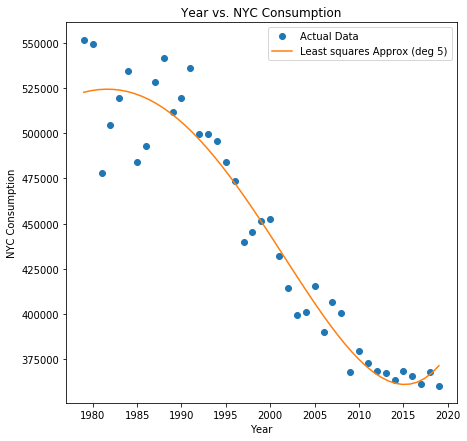

In [20]:
test.runFull()

In [21]:
n = MyProgram(5, df['Year'], df["New York City Population"], "Year", "NYC Population")

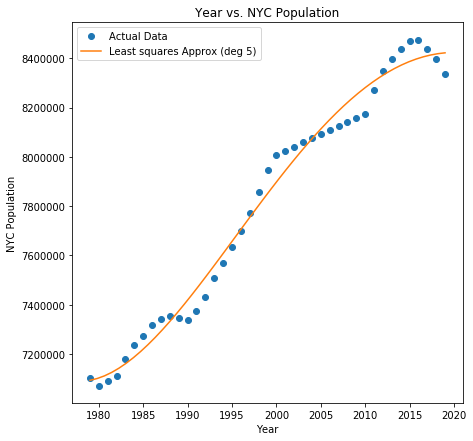

In [22]:
n.runFull()

## Conclusion

<p style="text-align: justify">I did accomplish all the goals I set out to accomplish in the Goals section. I did create a class called 'MyProgram' that generalizes the least squares approximation to a certain degree of polynomial. In addition, we were also able to showcase that given any dataset and any degree of polynomial we were able to come up with a least square approximation for that dataset and plot the information. Additionally, after we did the least squares approximation for both the year vs. population and year vs. consumption, there was an interesting trend to be noticed. As the population of NYC increased from 1979 to 2019, the total water consumption in NYC decreased which is quite interesting as one might expect it is to increase because more people are consuming water. The exact reason for this is inconclusive based on this particular data as it fails to take into account how water was allocated drinking, cooking, showering, etc. If such data was provided we could try to narrow our results further and find the reason. My hypothesis is that fewer people take longer showers or baths and or not take them twice a day. Althought the results main cause is inconclusive, the trend we notice is still interesting and worth looking into.<p> 

## Citations

1. *NYC Open Data* [Website Link](https://data.cityofnewyork.us/Environment/Water-Consumption-In-The-New-York-City/ia2d-e54m)


## Reflection

<p style="text-align: justify">I learned a lot of things from this project. To begin with, I learned how to import data using pandas, how to select data from it and do specific calculations with them. Secondly, I learned how to write classes in python which is something very useful not just in this class but in all my other CS classes as it is a core part of the 4 concepts of Object Oriented Programming. This project also re-enforced math concepts I learned in classes like Linear Algebra and make it much more visual and see the concepts in action on a real dataset. In the future, I would try to use more data such as the water consumption in each borough of the city and try to create more beautiful visualizations making use of seaborn and other python modules. In addition, I will try to test a much more stronger hypothesis and take into account other external factors which was not accounted for in this project.</p>